# Data Analysis

Data Science - P#01: *Data Analysis and Feature Engineering* - Spring 1403 \
In this phase, we aim to analyze our dataset further and get a deeper understanding, it can help us in the next phase.

In [820]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

In [821]:
DATASET_PATH = 'shipping.csv' 
PALETTE = [ "#023E8A", "#0077B6", "#00B4D8", "#90E0EF", "#FFB3C6", "#FF8FAB", "#FB6F92" ]
COLOR_MAP = sns.color_palette(palette=PALETTE, as_cmap=True)
THRESHOLD = 0.9

In [822]:
dataset = pd.read_csv(DATASET_PATH)

## Data Introduction

|Column|Description|
|--|--|
|ID|ID Number of Customers|
|Warehouse_block|The Company have big Warehouse which is divided in to block such as A,B,C,D,E|
|Mode_of_Shipment|The Company Ships the products in multiple way such as Ship, Flight and Road|
|Customer_care_calls|The number of calls made from enquiry for enquiry of the shipment|
|Customer_rating|The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|Cost_of_the_Product|Cost of the Product in US Dollars|
|Prior_purchases|The Number of Prior Purchase|
|Product_importance|The company has categorized the product in the various parameter such as low, medium, high|
|Gender|Male and Female|
|Discount_offered|Discount offered on that specific product|
|Weight_in_gms|It is the weight in grams|
|Reached.on.Time_Y.N|It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time|

## Data Analysis

In [823]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [824]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [825]:
dataset.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [826]:
def get_missing_values(df: pd.DataFrame):
    total_entities = len(df)
    missing_values = df.isna().sum()
    missing_proportion = (missing_values / total_entities) * 100
    return pd.DataFrame({'feature':missing_values.index, 'Count':missing_values.values, 'Percent':missing_proportion.values})

lost_values = get_missing_values(dataset)
lost_values

,feature,Count,Percent
0,ID,0,0.0
1,Warehouse_block,0,0.0
2,Mode_of_Shipment,0,0.0
3,Customer_care_calls,0,0.0
4,Customer_rating,0,0.0
5,Cost_of_the_Product,0,0.0
6,Prior_purchases,0,0.0
7,Product_importance,0,0.0
8,Gender,0,0.0
9,Discount_offered,0,0.0


In [827]:
numerical_data = dataset.select_dtypes(include=['int64', 'float64'])
categorical_data = dataset.select_dtypes(include=['object'])
sns.set_style('whitegrid')

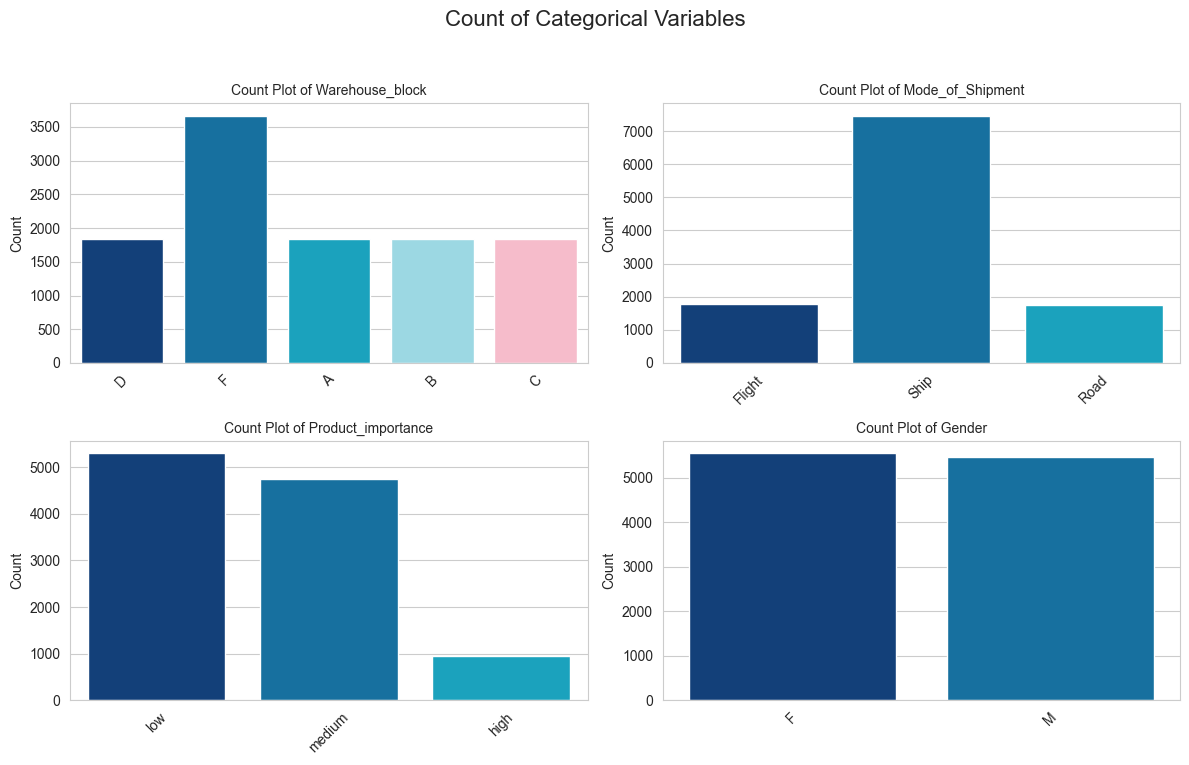

In [828]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(categorical_data.columns) / 2)), ncols=2, figsize=(12, 8))
fig.suptitle('Count of Categorical Variables', fontsize=16)

for ax, col in zip(axes.flatten(), categorical_data.columns):
    unique_values = categorical_data[col].nunique()
    sns.countplot(x=categorical_data[col], ax=ax, hue=categorical_data[col], palette=PALETTE[:unique_values], legend=False)
    ax.set_title(f'Count Plot of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

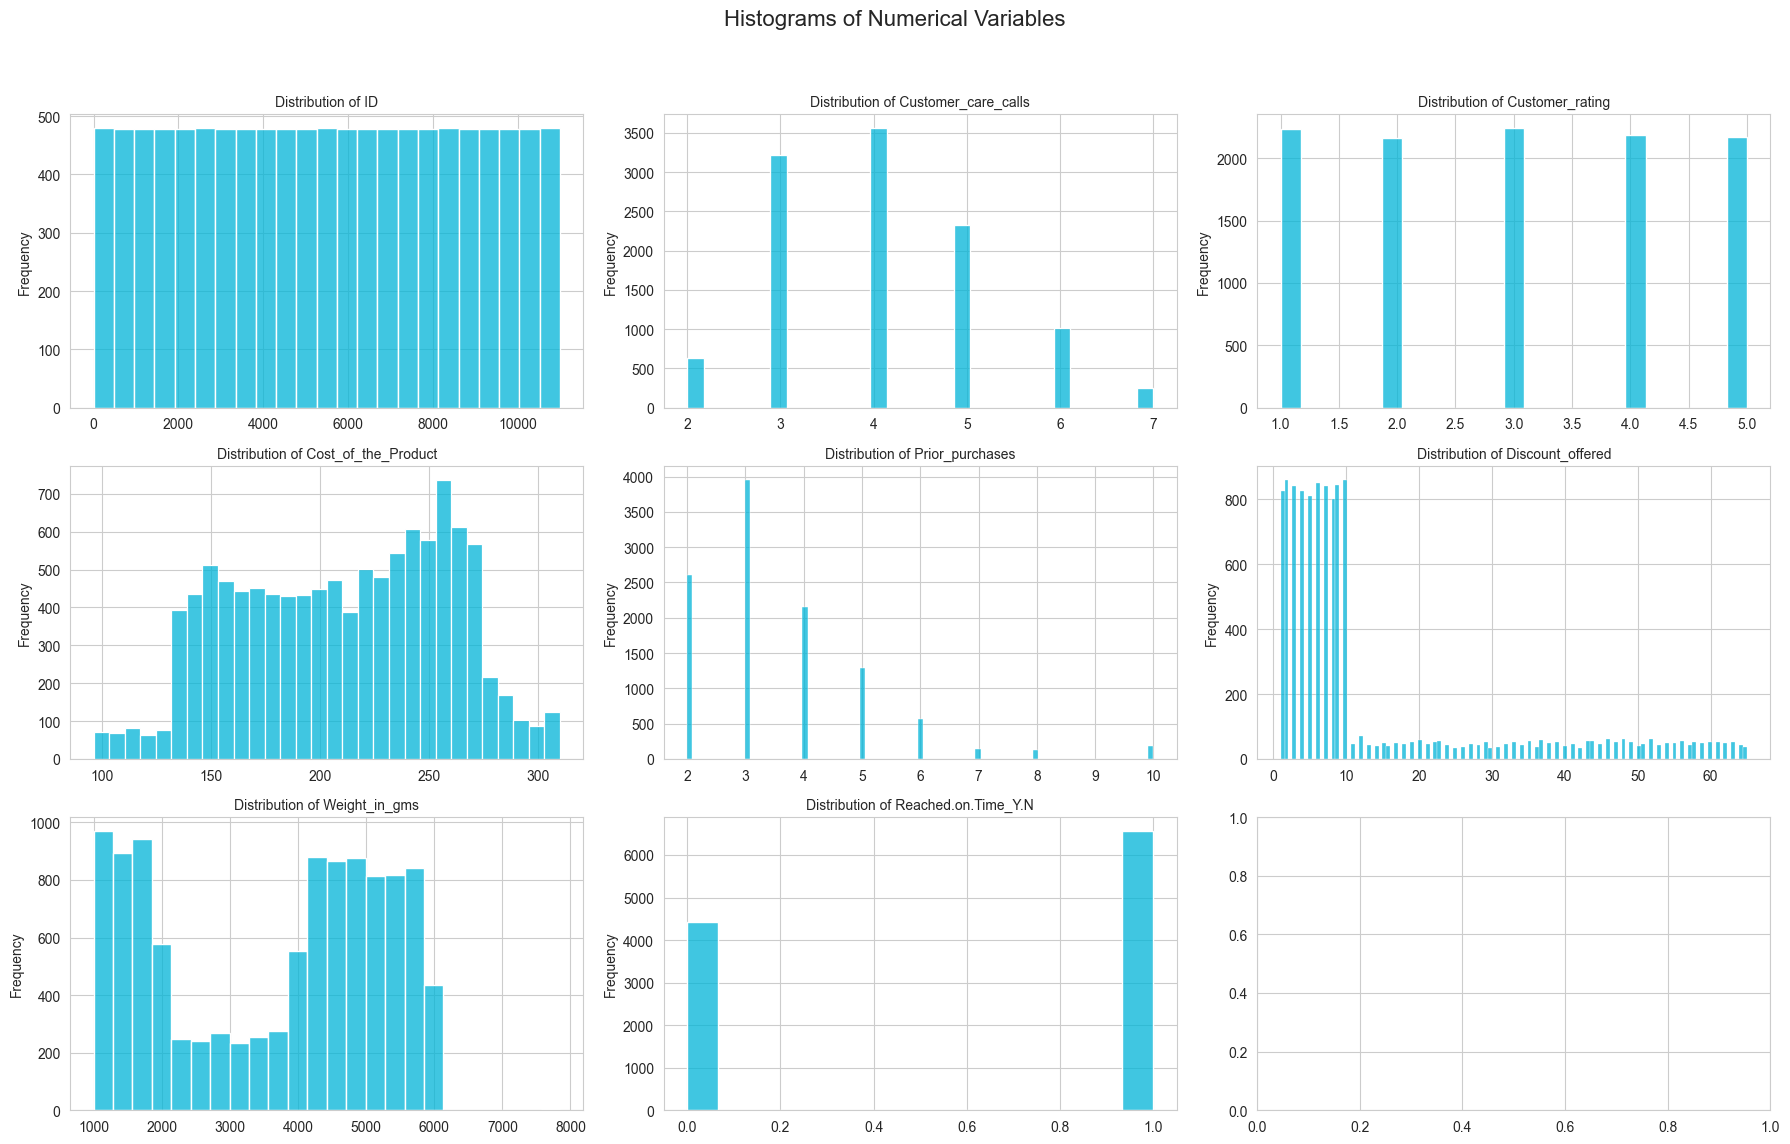

In [829]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical_data.columns) / 3)), ncols=3, figsize=(18, 12))
fig.suptitle('Histograms of Numerical Variables', fontsize=16)

for ax, col in zip(axes.flatten(), numerical_data.columns):
    sns.histplot(numerical_data[col], kde=False, ax=ax, color=PALETTE[2])
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

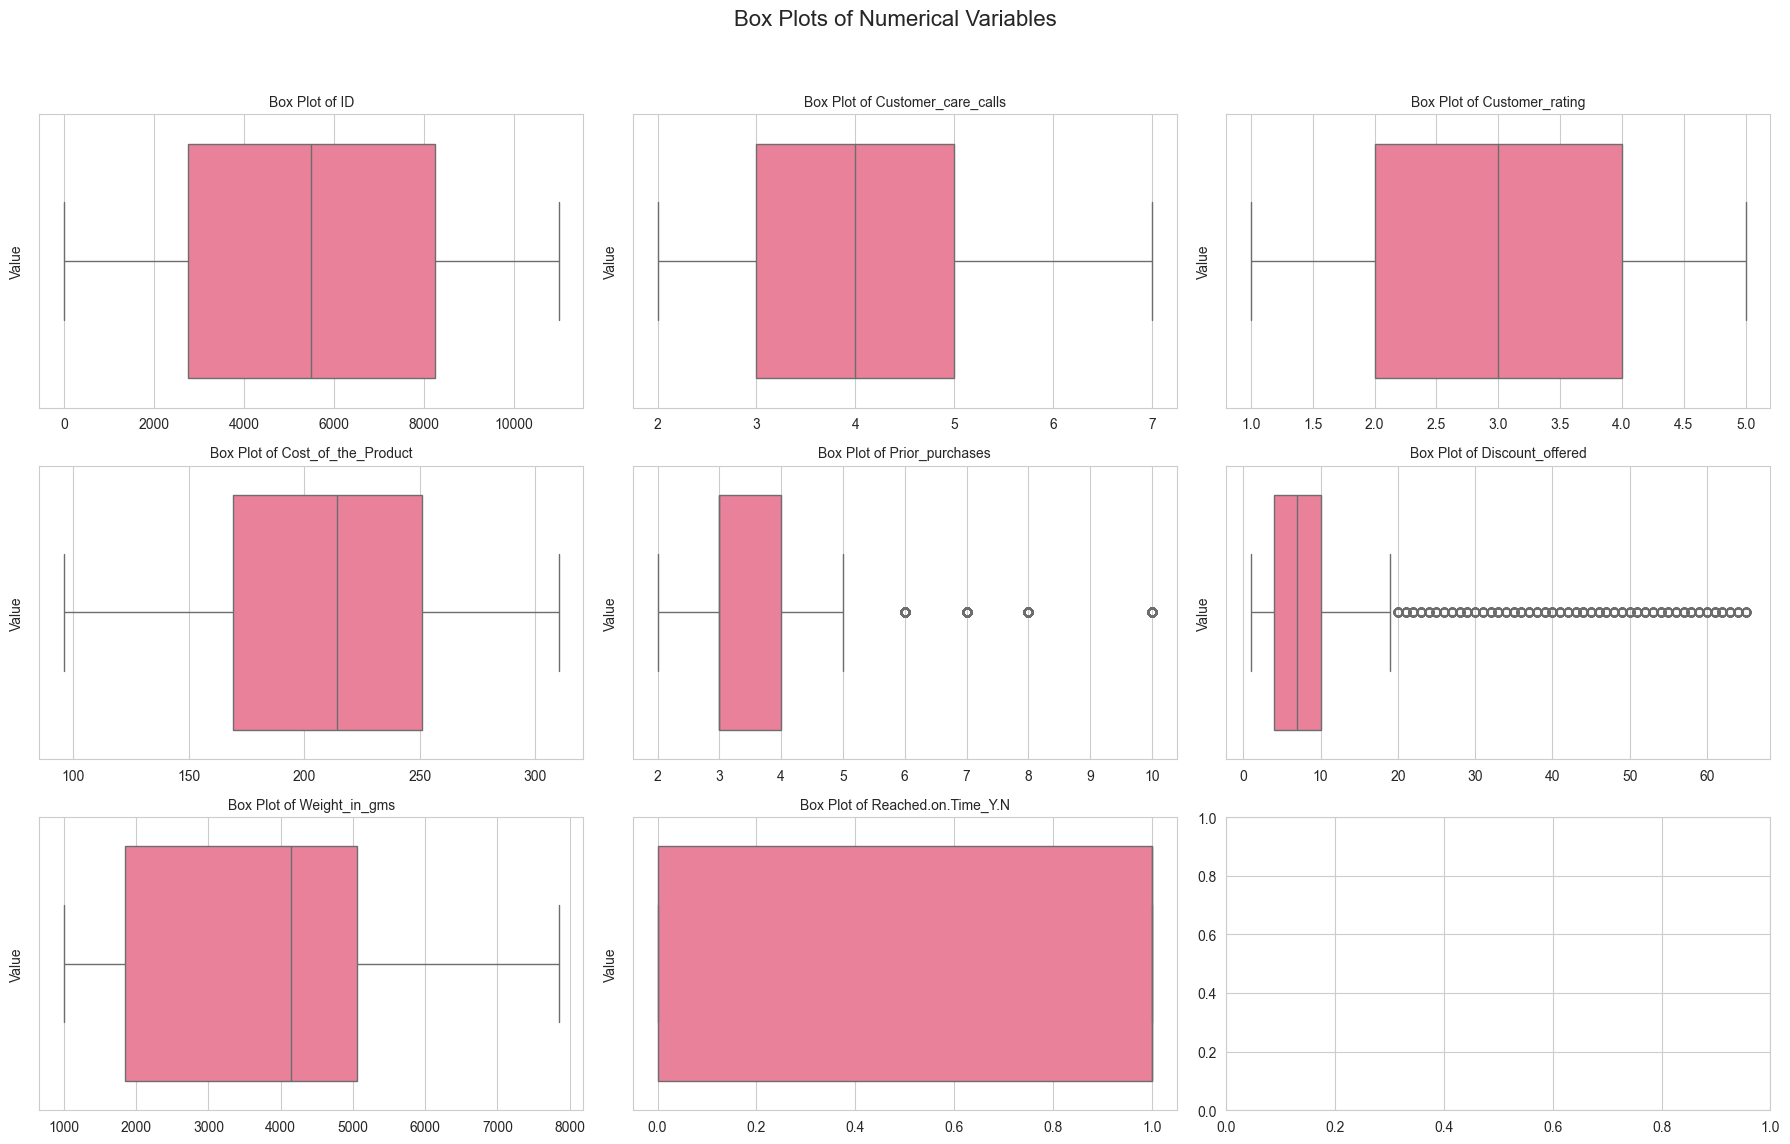

In [830]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical_data.columns) / 3)), ncols=3, figsize=(18, 12))
fig.suptitle('Box Plots of Numerical Variables', fontsize=16)

for ax, col in zip(axes.flatten(), numerical_data.columns):
    sns.boxplot(x=numerical_data[col], ax=ax, color=PALETTE[6])
    ax.set_title(f'Box Plot of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Value')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [831]:
def show_correlation_matrix(correlation_matrix, size1, size2, title, square=True):
    plt.figure(figsize=(size1, size2))
    sns.heatmap(correlation_matrix, annot=True, cmap=COLOR_MAP, fmt=".2f", linewidths=0.5, square=square)
    plt.title(title)
    plt.show()

In [832]:
def all_correlation_matrix_for_numeric(df: pd.DataFrame):
    numerical_features = dataset.select_dtypes(include=['int64', 'float64'])
    correlation_matrix = numerical_features.corr()
    show_correlation_matrix(correlation_matrix, 10, 8, "Correlation Matrix of Numerical Features")

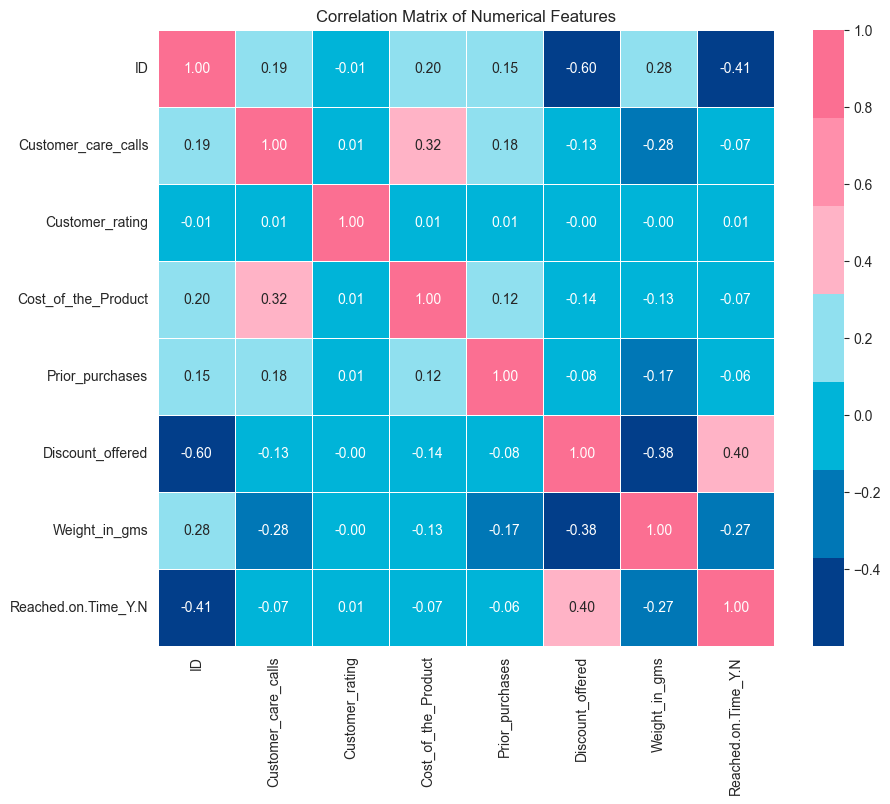

In [833]:
all_correlation_matrix_for_numeric(dataset)

In [834]:
def plot_distribution(data, features):
    fig, ax = plt.subplots(nrows=(len(features)+1)//2, ncols=2, figsize=(21,7))
    fig.suptitle(f"Distribution of features")
    i, j = 0, 0
    for f in features:
        sns.histplot(data=data, x=f, ax=ax[i][j], kde=True, stat="density", linewidth=0, color=PALETTE[2])
        i += j
        j = 1 - j
    plt.show()

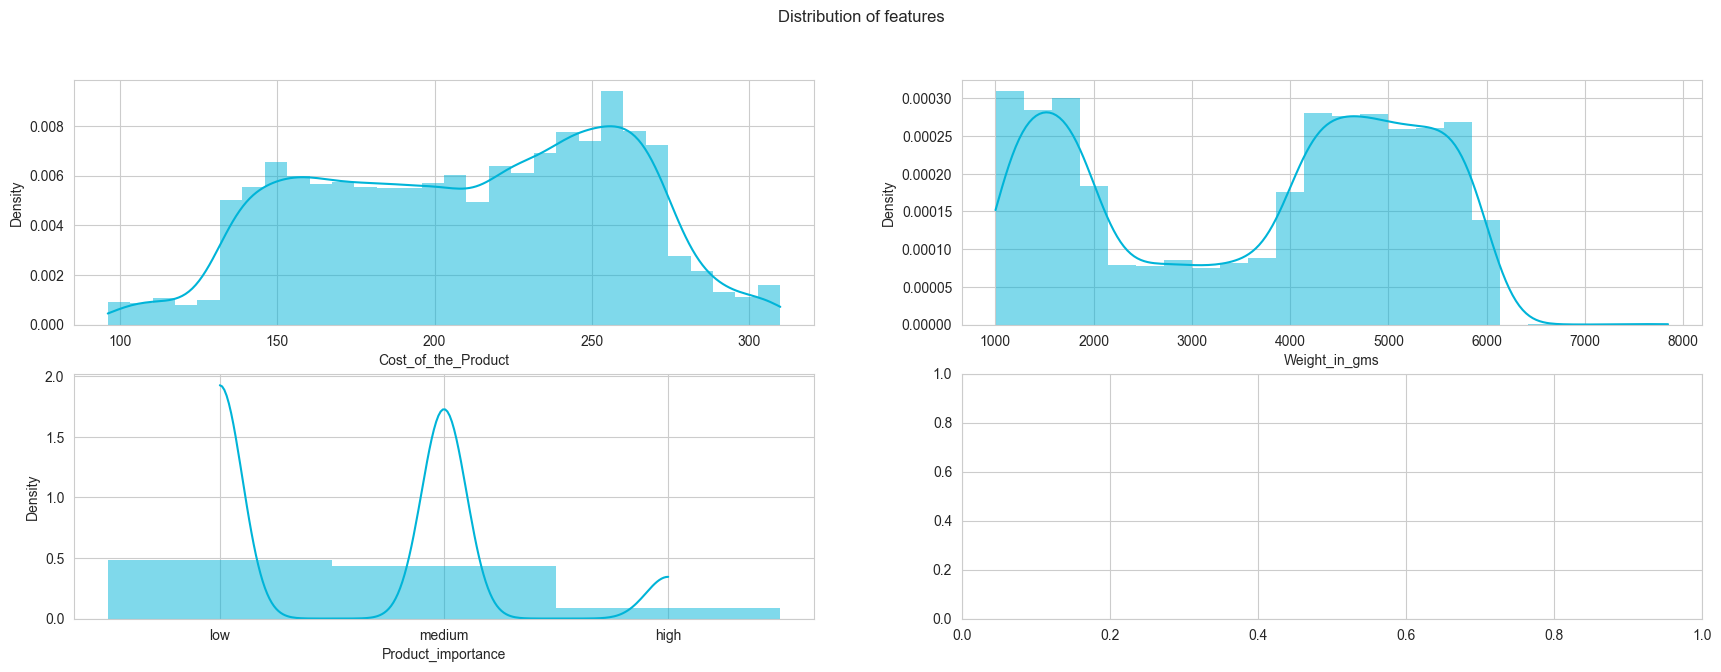

In [835]:
features = {"Cost_of_the_Product", "Product_importance", "Weight_in_gms"}
plot_distribution(dataset, features)

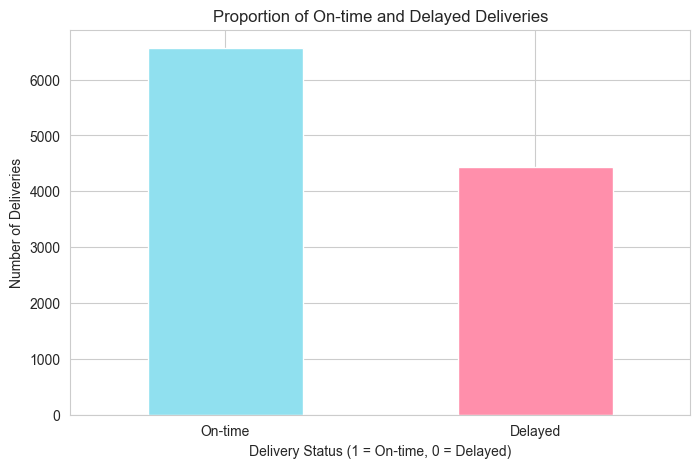

In [836]:
on_time_deliveries = dataset['Reached.on.Time_Y.N'].value_counts()

plt.figure(figsize=(8, 5))
on_time_deliveries.plot(kind='bar', color={PALETTE[3], PALETTE[5]})
plt.title('Proportion of On-time and Delayed Deliveries')
plt.xlabel('Delivery Status (1 = On-time, 0 = Delayed)')
plt.ylabel('Number of Deliveries')
plt.xticks(ticks=[0, 1], labels=['On-time', 'Delayed'], rotation=0)
plt.show()

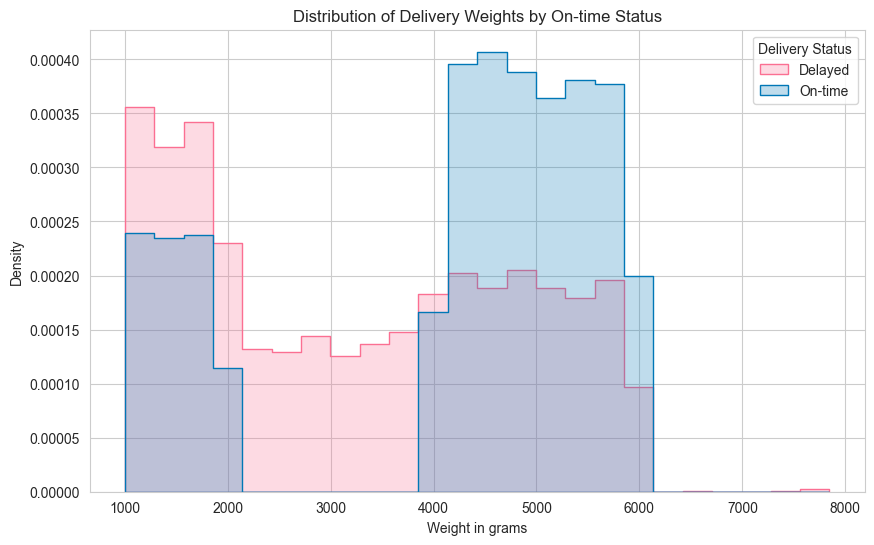

In [837]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Weight_in_gms', hue='Reached.on.Time_Y.N', element='step', stat='density', common_norm=False, palette={PALETTE[1], PALETTE[6]})
plt.title('Distribution of Delivery Weights by On-time Status')
plt.xlabel('Weight in grams')
plt.ylabel('Density')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

## Data Cleaning

### Missing data

In [838]:
def handle_missing_data(_df: pd.DataFrame, loss_values_stats: pd.DataFrame, del_threshold: float = 0.5, restricted_col=['NumPurchases']):
    mean_kind = ['i', 'f']
    mode_kind = ['O']
    df = _df.copy(deep=True)
    for feature, percent in zip(loss_values_stats['feature'], loss_values_stats['Percent']):
        if percent == 0 or feature in restricted_col:
            continue
        elif percent >= del_threshold * 100:
            df.drop(feature, axis=1, inplace=True)
        elif df[feature].dtype.kind in mean_kind:
            df[feature].fillna(df[feature].mean(), inplace=True)
        elif df[feature].dtype.kind in mode_kind:
            df[feature].fillna(df[feature].mode()[0], inplace=True)
            
    return df

but there is no missing value in shipping dataset.

### Object data

### Redundant Features

In [839]:
def remove_redundant_columns(df: pd.DataFrame, threshold):
    correlation_matrix = df.corr()
    num_columns = len(correlation_matrix.columns)
    for i in range(num_columns):
        for j in range(i + 1, num_columns):  
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                print(f"Columns '{correlation_matrix.columns[i]}' and '{correlation_matrix.columns[j]}' are same Dropping '{correlation_matrix.columns[j]}'")
                df.drop(correlation_matrix.columns[j], axis=1, inplace=True)
    show_correlation_matrix(df.corr(), 10, 8, "Correlation Matrix after removement")
    return df

In [ ]:
#remove_redundant_columns(dataset, THRESHOLD)

### additional feature engineering

In [ ]:
def feature_engineering(df: pd.DataFrame):    
    df = df.drop(columns=['ID'])

    # Adding two new features : 'cost_of_the_product_per_gram' and 'cost_minus_discount'
    df['cost_of_the_product_per_gram'] = df['Cost_of_the_Product']/df['Weight_in_gms']
    df['cost_minus_discount'] = df['Cost_of_the_Product']-df['Discount_offered']
    df.info()

In [ ]:
feature_engineering(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Warehouse_block               10999 non-null  object 
 1   Mode_of_Shipment              10999 non-null  object 
 2   Customer_care_calls           10999 non-null  int64  
 3   Customer_rating               10999 non-null  int64  
 4   Cost_of_the_Product           10999 non-null  int64  
 5   Prior_purchases               10999 non-null  int64  
 6   Product_importance            10999 non-null  object 
 7   Gender                        10999 non-null  object 
 8   Discount_offered              10999 non-null  int64  
 9   Weight_in_gms                 10999 non-null  int64  
 10  Reached.on.Time_Y.N           10999 non-null  int64  
 11  cost_of_the_product_per_gram  10999 non-null  float64
 12  cost_minus_discount           10999 non-null  int64  
dtypes

### Normalize and Standardize

Feature scaling is a critical preprocessing step in machine learning that helps to normalize the range of independent variables or features in the dataset. Also, this helps algorithms to converge faster. Here, let's delve into the common feature scaling algorithms and their significance:

- **Equal Weighage**: Scaling ensures that all features contribute equally to the analysis and model training process, preventing features with larger scales from dominating those with smaller scales.
- **Algorithms Sensitivity**: Many machine learning algorithms, such as k-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Principal Component Analysis (PCA), are sensitive to the relative scales of the features. Feature scaling helps these algorithms perform better.

1. **Normalization (Min-Max Scaling)**:
   - **Formula**: $$x_i = \frac{x_i - min(X)}{max(X) - min(X)}$$
   - **Range**: Transforms features to a specific range (commonly $[0,1]$ or $[-1,1]$).
   - **Use Case**: Particularly useful when the features have a bounded minimum and maximum value.

2. **Standardization**:
   - **Formula**: $$x_{i} = \frac{x_{i} - mean(X)}{StandardDeviation(X)}$$
   - **Mean and Standard Deviation**: Transforms features to have a mean of 0 and a standard deviation of 1.
   - **Use Case**: useful when the feature distribution is Normal or Gaussian, not bound to a specific range, and when dealing with outliers.